# House Prices - Eplanatory Data Analysis (EDA)

This notebook follows the intern technical assessment for machine learning developer and provides a straightforward EDA and simple linear regression baseline. Run from top to bottom in JupyterLab or Jupyter Notebook. 

## Importing different libraries all at once.

In [1]:
# Imports and settings (Initial)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
sns.set(style='whitegrid')

## Data Acquisition.

Loading datasets into notebook.

In [2]:
# Loading the data

train_path = '/Users/berry_m/Downloads/house-prices-advanced-regression-techniques/train.csv'
test_path = '/Users/berry_m/Downloads/house-prices-advanced-regression-techniques/test.csv'

df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
print('Train shape:', df.shape)
print('Test shape:', df_test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


## Data understanding.

This step display data structure, data types, sample records, identify numerical, categorical features, missing values and basic descriptive stats.

In [4]:
# Structure and basic descriptive stats
print(df.info())
display(df.describe(include='all').T)

# Identify numerical and categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'SalePrice' in numeric_cols: numeric_cols.remove('SalePrice')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print('\nNumeric count:', len(numeric_cols))
print('Categorical count:', len(categorical_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Numeric count: 37
Categorical count: 43


## Data Cleaning and Preparation

This step heps with Handling missing or incorrect data appropriately, duplicates, encode categorical variables if necessary, and ensure data types are consistent and meaningful.

In [15]:
# Missing values and duplicates
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0].head(50))
print('\nDuplicate rows:', df.duplicated().sum())

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Duplicate rows: 0


## Explanatory Data Analysis

## Data visualizations

This step helps you understand the distribution of your target variable (SalePrice) in the house price dataset.

Distribution of target and a few scatter plots.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


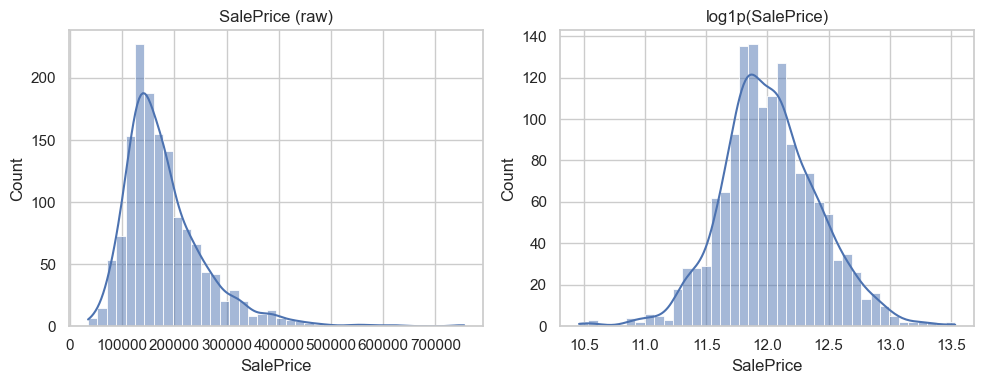

In [16]:
# SalePrice distribution
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['SalePrice'], bins=40, kde=True)
plt.title('SalePrice (raw)')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['SalePrice']), bins=40, kde=True)
plt.title('log1p(SalePrice)')
plt.tight_layout()
plt.show()

## Explanatory Data Analysis

This step helps us understand which numeric features influence or have the strongest relationship with the SalePrice and also identifies the correlation 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

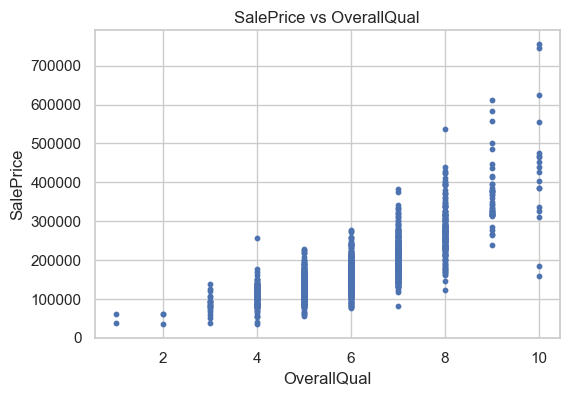

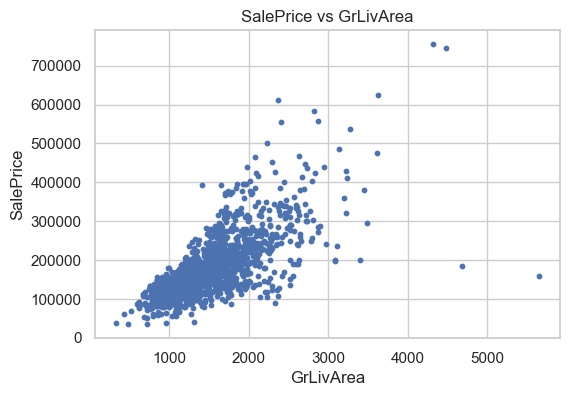

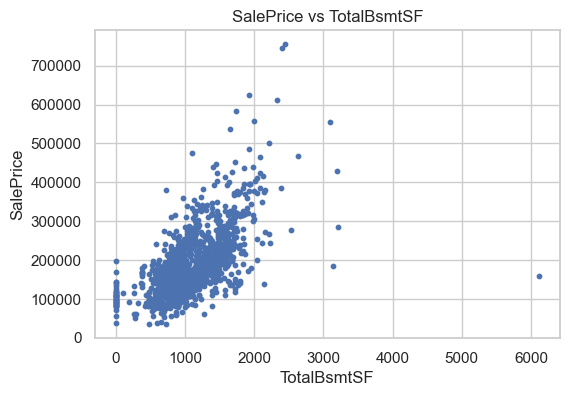

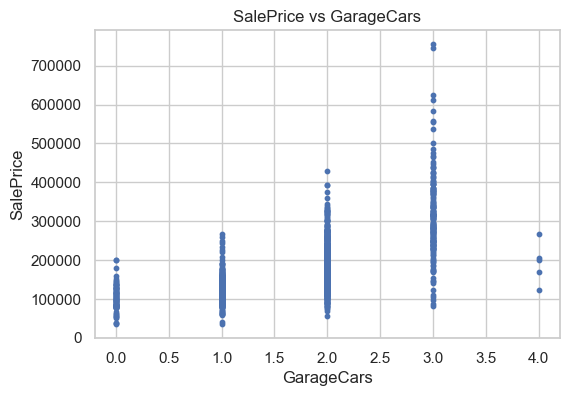

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlations with SalePrice and ignored NaN or missing values
corr = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False)
display(corr.head(20))

# Scatter plots for a few known features
for f in ['OverallQual','GrLivArea','TotalBsmtSF','GarageCars']:
    if f in df.columns:  # check column exists
        plt.figure(figsize=(6,4))
        plt.scatter(df[f], df['SalePrice'], s=10)
        plt.xlabel(f)
        plt.ylabel('SalePrice')
        plt.title(f'SalePrice vs {f}')
        plt.grid(True)
        plt.show()

## Minimal cleaning and baseline model

In this step, we fill missing numeric values with the median of each column (the middle value), select the top 5 features that shows the strongest correlation with SalePrice, so that missing data doesn’t cause errors during Linear Regression model test. This provides a quick baseline performance before trying more advanced models.

In [17]:
# Baseline: top 5 numeric features by correlation
numeric = df.select_dtypes(include=[np.number])
corr_with_target = numeric.corr()['SalePrice'].abs().sort_values(ascending=False)
top5 = corr_with_target.index[1:6].tolist()
print('Top5:', top5)

X = df[top5].copy()
y = np.log1p(df['SalePrice'])

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f'Validation RMSE (log1p): {rmse:.4f}, R^2: {r2:.4f}')

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=kf)
cv_rmse = np.sqrt(-cv_scores)
print('5-fold CV RMSE (log1p):', np.round(cv_rmse,4))
print('Mean CV RMSE:', np.round(cv_rmse.mean(),4))

Top5: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
Validation RMSE (log1p): 0.1810, R^2: 0.8244
5-fold CV RMSE (log1p): [0.181  0.1628 0.248  0.1855 0.1541]
Mean CV RMSE: 0.1863


## Insights and Interpretation
The main features that affect house prices (SalePrices) are:
- How well is built (OverallQual).
- How much living space it has (GrLivArea and TotalSF).
- The size of the garage (GarageCars, GarageArea).
- How old the house is (YearsBuilt/houseAge).
- Where it is located (Neighborhood).

## Recommendations
- Handling categorical variables with missing data properly, consider imputing with 'None' or 'Unknown' instead of dropping them. This preserves information about absence of feature.
- Creating engineered features.
- Trying regularized or tree-based models.
- Visualizing more relationships to uncover hidden patterns.

# README.md with brief setup instructions and overview

## Overview
This project provides an **exploratory data analysis (EDA)** of the House Prices dataset (from Kaggle's "House Prices: Advanced Regression Techniques"). The notebook walks through:

1. Import of different libraries.
2. Data Acqusition and Loading.
3. Data Understanding.
4. Data and Preparation.
5. Explanatory Data Analysis, data visualizations of feature distributions and relationships with `SalePrice`.
6. A simple baseline Linear Regression model using top correlated numeric features.
7. Key insights, interpretation, and conclusions about the features that influence house prices.
8. Recommendations for future modelling or feature engineering.

The purpose of this notebook is to summarize patterns in the dataset and provide a quick predictive baseline.

## Setup Instructions

1. **Clone or download this repository** to your local machine.